In [ ]:
pip install afinn

In [ ]:
import pandas as pd
import re
from afinn import Afinn

In [ ]:
df= pd.read_csv("/content/EV_tweets1L_clean.csv")

In [ ]:
df.head()

,NO.,raw,cleaned
0,0,Hyundai UK Prices &amp; Specs For Ioniq 6 http...,hyundai uk prices amp specs for ioniq 6 ev ve ...
1,1,Zevvy Makes Electric Cars Affordable For Super...,zevvy makes electric cars affordable for super...
2,2,$CNC.V: “Imagine the leverage there if they ca...,cnc imagine the leverage there if they can up...
3,3,Hey @BeauTFC Any thoughts on this #EV for the ...,hey any thoughts on this ev for the dod
4,4,We have joined more than 100 major companies a...,we have joined more than 100 major companies a...


In [ ]:
df1 = [df['cleaned']]
df1

[0         hyundai uk prices amp specs for ioniq 6 ev ve ...
 1         zevvy makes electric cars affordable for super...
 2          cnc imagine the leverage there if they can up...
 3                  hey any thoughts on this ev for the dod 
 4         we have joined more than 100 major companies a...
                                 ...                        
 99998     rhode island passes soonest 100 renewable elec...
 99999      sondaggi italia sondaggio di ipsos pd amp 21 ...
 100000    good morning from jackson this porsche has bee...
 100001     imdi girin bakal kira ev ksekten ev sahibi mi...
 100002    how to find out if you re eligible to pre orde...
 Name: cleaned, Length: 100003, dtype: object]

In [ ]:
df['cleaned']=df['cleaned'].apply(str)
df.dtypes

NO.        object
raw        object
cleaned    object
dtype: object

In [ ]:
#instantiate afinn
afn = Afinn()

scores = [afn.score(df) for df in df['cleaned']]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]

In [ ]:
df['scores'] = scores
df['sentiments'] = sentiment

In [ ]:
df

,NO.,raw,cleaned,scores,sentiments
0,0,Hyundai UK Prices &amp; Specs For Ioniq 6 http...,hyundai uk prices amp specs for ioniq 6 ev ve ...,0.0,neutral
1,1,Zevvy Makes Electric Cars Affordable For Super...,zevvy makes electric cars affordable for super...,5.0,positive
2,2,$CNC.V: “Imagine the leverage there if they ca...,cnc imagine the leverage there if they can up...,0.0,neutral
3,3,Hey @BeauTFC Any thoughts on this #EV for the ...,hey any thoughts on this ev for the dod,0.0,neutral
4,4,We have joined more than 100 major companies a...,we have joined more than 100 major companies a...,1.0,positive
...,...,...,...,...,...
99998,99995,Rhode Island Passes Soonest 100% Renewable Ele...,rhode island passes soonest 100 renewable elec...,2.0,positive
99999,99996,#Sondaggi #Italia\nSondaggio di Ipsos:\n\n#PD|...,sondaggi italia sondaggio di ipsos pd amp 21 ...,0.0,neutral
100000,99997,Good morning from @Barrett_Jackson! This #Pors...,good morning from jackson this porsche has bee...,6.0,positive
100001,99998,Şimdi girin bakalım #kira #ev yüksekten ev sah...,imdi girin bakal kira ev ksekten ev sahibi mi...,0.0,neutral


In [ ]:
df_negative = df[df["sentiments"]=="negative"]
df_positive = df[df["sentiments"]=="positive"]
df_neutral = df[df["sentiments"]=="neutral"]

In [ ]:
df_negative.head()

,NO.,raw,cleaned,scores,sentiments
8,8,Alliance forms to demand EV industry developme...,alliance forms to demand ev industry developme...,-1.0,negative
11,11,Multi-unit dwelling (MUD) charger 🏙️🚘🔌 install...,multi unit dwelling mud charger installation a...,-2.0,negative
14,14,Some Twitter users are receiving fake account ...,some twitter users are receiving fake account ...,-6.0,negative
50,50,"Emotion analysis technologies could be ""immatu...",emotion analysis technologies could be immatur...,-4.0,negative
51,51,AMD Radeon RX 7900 spied in leaked photos with...,amd radeon rx 7900 spied in leaked photos with...,-1.0,negative


In [ ]:
df_positive.head()

,NO.,raw,cleaned,scores,sentiments
1,1,Zevvy Makes Electric Cars Affordable For Super...,zevvy makes electric cars affordable for super...,5.0,positive
4,4,We have joined more than 100 major companies a...,we have joined more than 100 major companies a...,1.0,positive
12,12,Zevvy Makes Electric Cars Affordable For Super...,zevvy makes electric cars affordable for super...,5.0,positive
20,20,‘Severance’ Season Two Starts Production at Ap...,severance season two starts production at app...,3.0,positive
23,23,Apple’s Famous Backlit Logo Could Be Returning...,apple famous backlit logo could be returning t...,6.0,positive


In [ ]:
df_neutral.head()

,NO.,raw,cleaned,scores,sentiments
0,0,Hyundai UK Prices &amp; Specs For Ioniq 6 http...,hyundai uk prices amp specs for ioniq 6 ev ve ...,0.0,neutral
2,2,$CNC.V: “Imagine the leverage there if they ca...,cnc imagine the leverage there if they can up...,0.0,neutral
3,3,Hey @BeauTFC Any thoughts on this #EV for the ...,hey any thoughts on this ev for the dod,0.0,neutral
5,5,Hyundai UK Prices &amp; Specs For Ioniq 6 http...,hyundai uk prices amp specs for ioniq 6 tesla ...,0.0,neutral
6,6,tVehicle•com \nDomain is available for Acquisi...,tvehicle com domain is available for acquisiti...,0.0,neutral


In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
df1 = count_values_in_column(df,"sentiments")

In [ ]:
df1

,Total,Percentage
neutral,49609,49.61
positive,39861,39.86
negative,10533,10.53


In [ ]:
import matplotlib.pyplot as plt

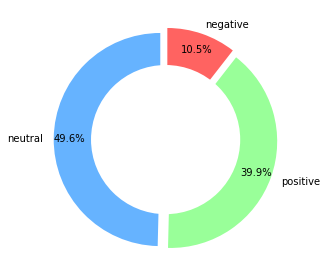

In [ ]:
# Pie chart
labels = ['neutral', 'positive', 'negative']
sizes = df1['Percentage']
#colors
colors = ['#66b3ff','#99ff99','#ff6361']


#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
pip install wordcloud

Wordcloud of Negative Tweets

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = " ".join(review for review in df_negative["cleaned"].astype(str))
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

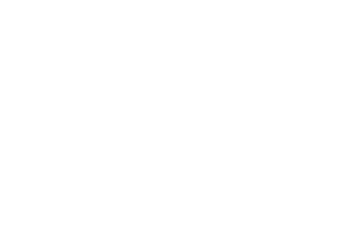

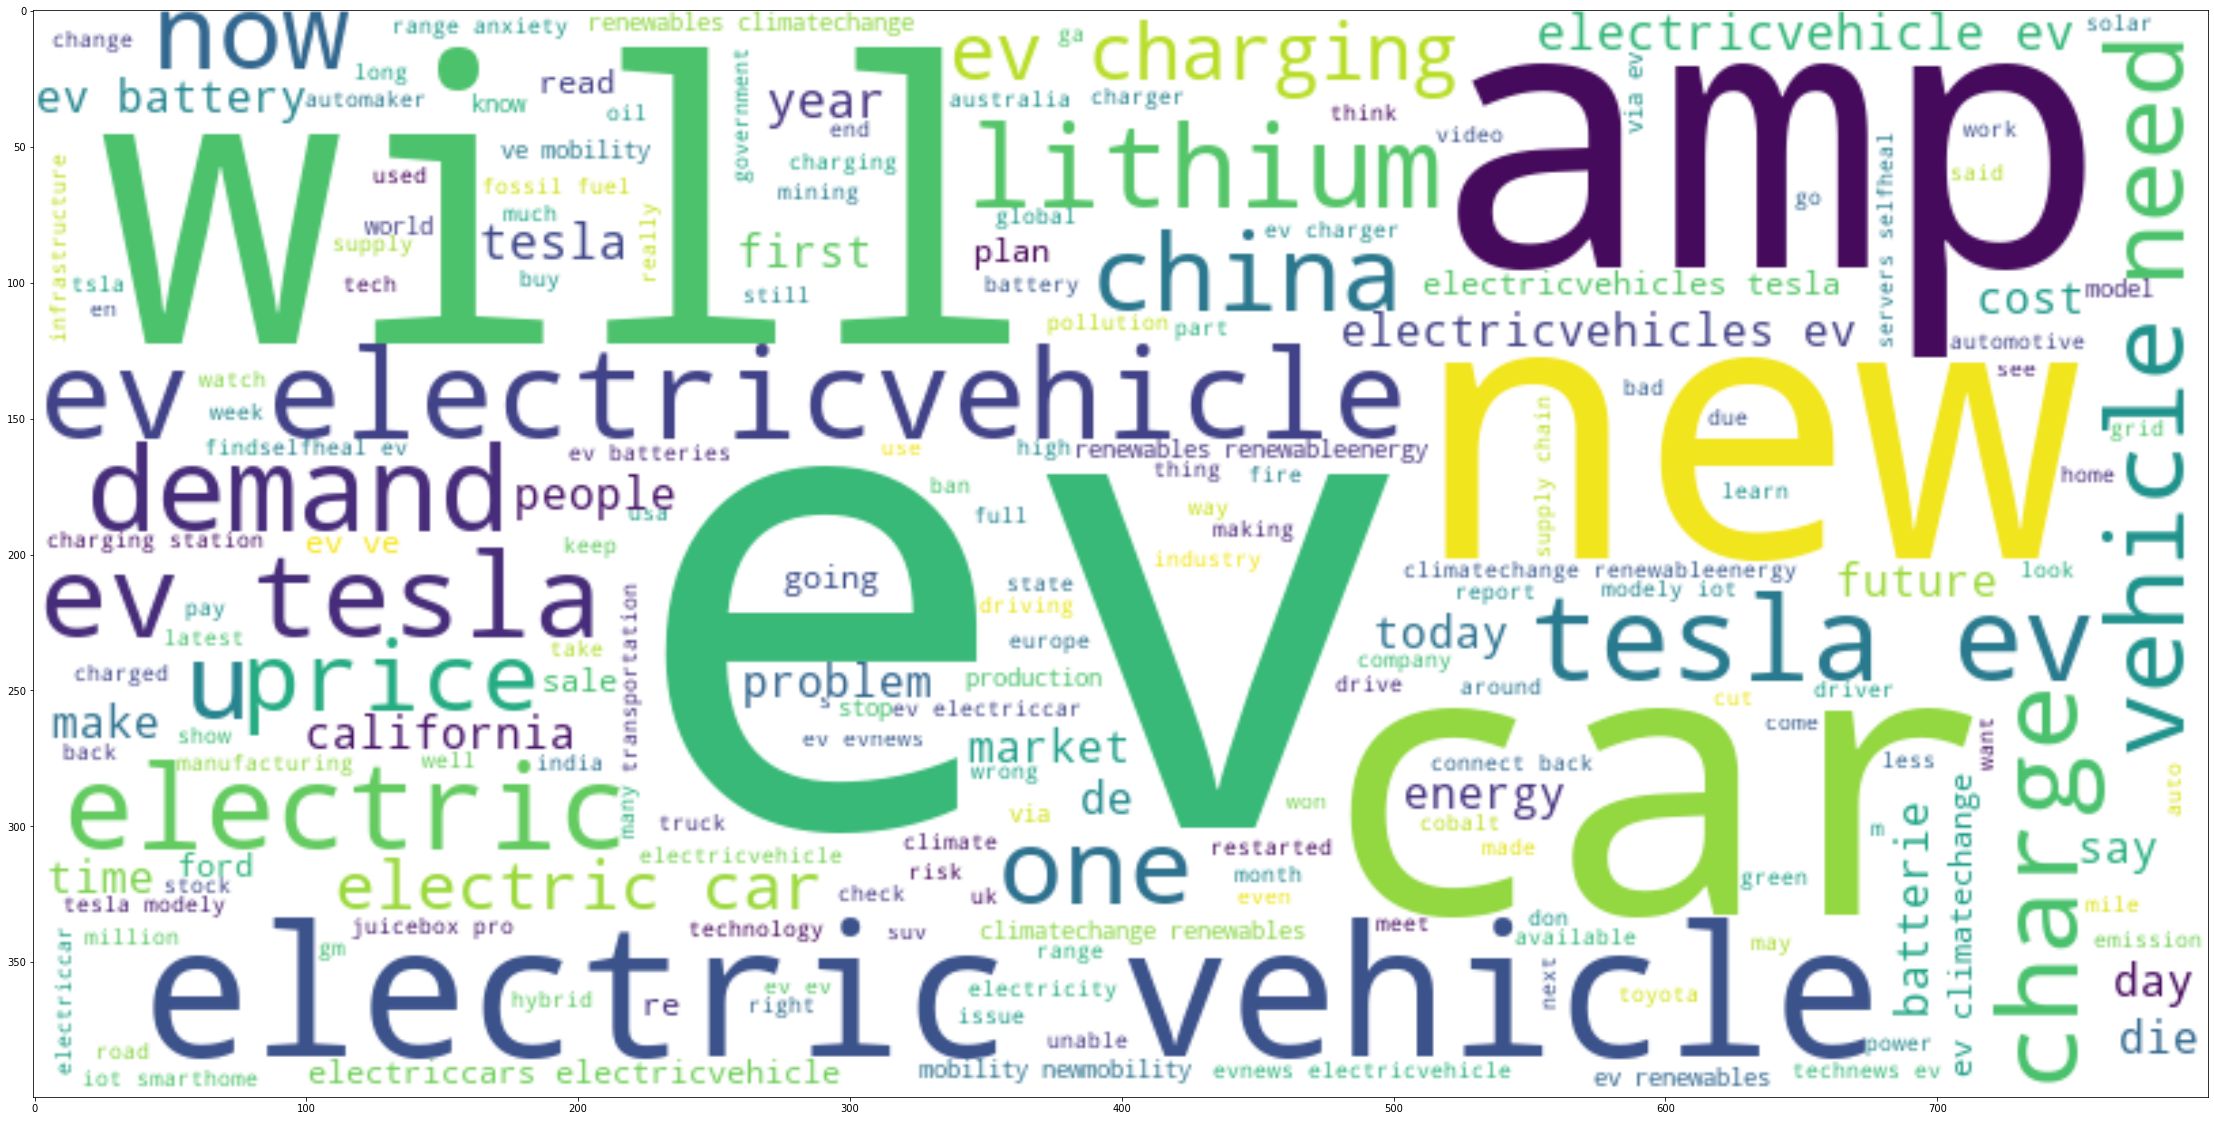

In [ ]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
text_positive = " ".join(review for review in df_positive["cleaned"].astype(str))
stopwords = set(STOPWORDS)

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text_positive)

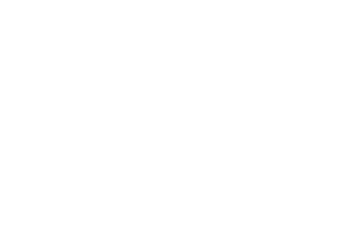

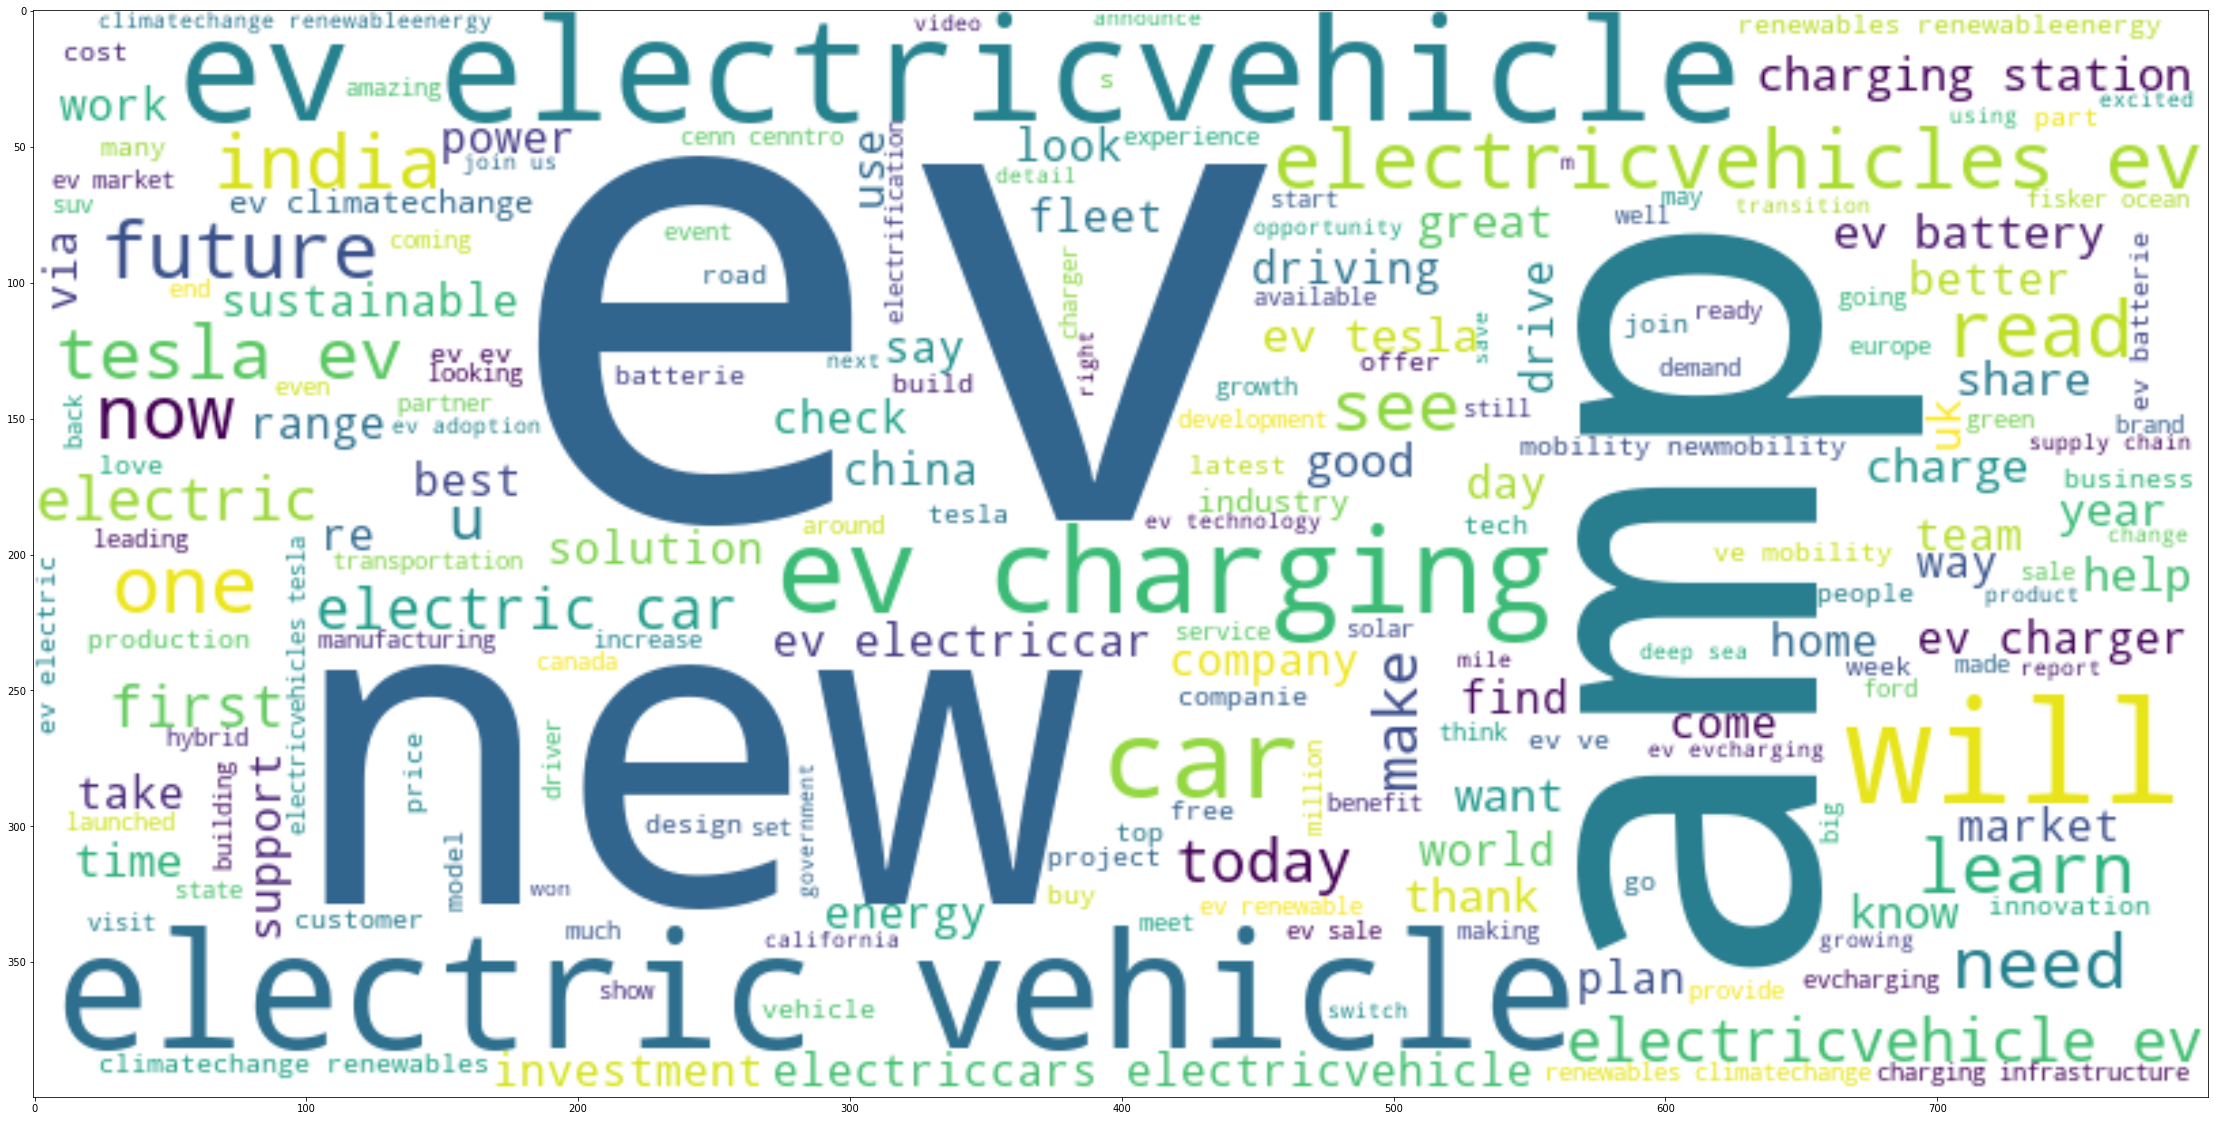

In [ ]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop = stopwords.words('english')
df_wf_n['tweet_without_stopwords'] = df_negative['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df_wf_n)

8                          alliance forms to demand ev industry developme...
11                         multi unit dwelling mud charger installation a...
14                         some twitter users are receiving fake account ...
50                         emotion analysis technologies could be immatur...
51                         amd radeon rx 7900 spied in leaked photos with...
                                                 ...                        
99971                      awesomely weird alibaba electric vehicle of th...
99985                      we need to bring the specific garbage patch in...
99986                      12 cruise ev robotaxis shut down san francisco...
99997                      took delivery yesterday ford absolutely crushe...
tweet_without_stopwords    8        alliance forms demand ev industry dev...
Name: cleaned, Length: 10534, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [ ]:
bagofwords=[]
for tweet in df_wf_n['tweet_without_stopwords']:
  result = tweet.split()
  bagofwords.append(result)

In [ ]:
bagofwords[0]

['alliance',
 'forms',
 'demand',
 'ev',
 'industry',
 'development',
 'brandonhow',
 'vehicles',
 'ev',
 'electricvehicles',
 'evcouncil',
 'manufacturing',
 'industry',
 'investment']

In [ ]:
import collections
import itertools
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['alliance', 'forms', 'demand', 'ev', 'industry', 'development', 'brandonhow', 'vehicles', 'ev', 'electricvehicles']

Most commonly occuring words and frequency


[('ev', 12260),
 ('tesla', 2139),
 ('electric', 1983),
 ('electricvehicles', 1683),
 ('charging', 1094),
 ('new', 1086),
 ('battery', 1075),
 ('amp', 1024),
 ('electricvehicle', 877),
 ('car', 872),
 ('cars', 834),
 ('lithium', 808),
 ('vehicles', 807),
 ('demand', 753),
 ('evs', 703),
 ('climatechange', 550),
 ('vehicle', 535),
 ('batteries', 533),
 ('1', 500),
 ('one', 499)]

In [ ]:
neg_wf= pd.DataFrame(words_freq.most_common(20), columns=['Words','Freq'])
neg_wf.head()

,Words,Freq
0,ev,12260
1,tesla,2139
2,electric,1983
3,electricvehicles,1683
4,charging,1094


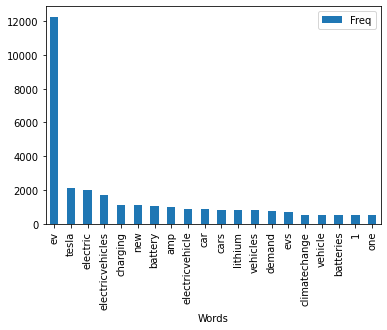

In [ ]:
ax = neg_wf.plot.bar(x='Words', y='Freq', rot=90)

Positive tweets words frequency

In [ ]:
df_wf_p = df_positive['cleaned']
df_wf_p['tweet_without_stopwords'] = df_positive['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_wf_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


1                          zevvy makes electric cars affordable for super...
4                          we have joined more than 100 major companies a...
12                         zevvy makes electric cars affordable for super...
20                          severance season two starts production at app...
23                         apple famous backlit logo could be returning t...
                                                 ...                        
99992                      u solar trade association expands board of dir...
99993                       automotive trends how people buy amp sell veh...
99998                      rhode island passes soonest 100 renewable elec...
100000                     good morning from jackson this porsche has bee...
tweet_without_stopwords    1         zevvy makes electric cars affordable...
Name: cleaned, Length: 39862, dtype: object

In [ ]:
bagofwords_positive=[]
for tweet in df_wf_p['tweet_without_stopwords']:
  result = tweet.split()
  bagofwords_positive.append(result)

In [ ]:
all_words_pos = list(itertools.chain(*bagofwords_positive))
print(all_words_pos[0:10])
print()
print("Most commonly occuring words and frequency")
words_freq = collections.Counter(all_words_pos)
words_freq.most_common(20)

['zevvy', 'makes', 'electric', 'cars', 'affordable', 'super', 'commuters', 'ev', 'mobility', 'newmobility']

Most commonly occuring words and frequency


[('ev', 47797),
 ('electric', 10334),
 ('electricvehicles', 6655),
 ('charging', 5369),
 ('amp', 5045),
 ('new', 4991),
 ('tesla', 4830),
 ('electricvehicle', 4597),
 ('battery', 3859),
 ('vehicles', 3336),
 ('evs', 3261),
 ('car', 2974),
 ('cars', 2868),
 ('vehicle', 2732),
 ('us', 2690),
 ('sustainability', 2656),
 ('energy', 2276),
 ('lithium', 2181),
 ('electriccars', 2106),
 ('future', 2042)]

In [ ]:
pos_wf= pd.DataFrame(words_freq.most_common(20), columns=['Words','Freq'])
pos_wf.head()

,Words,Freq
0,ev,47797
1,electric,10334
2,electricvehicles,6655
3,charging,5369
4,amp,5045


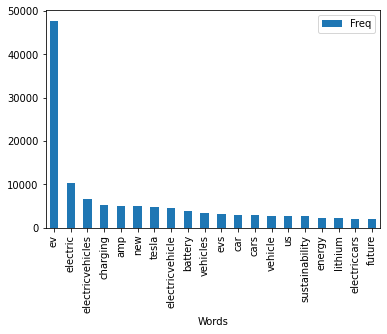

In [ ]:
ax = pos_wf.plot.bar(x='Words', y='Freq', rot=90)